In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns
import dmba
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression

In [13]:
df = pd.read_csv('/db/winequality-red.csv')
df.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
# Check type of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [15]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [16]:
# Check for data size
df.shape

(1599, 12)

In [17]:
# Check for NaN values
df.isnull().sum().sum()

0

In [27]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [31]:
X= df.drop(columns = ["quality"])
y=df['quality']

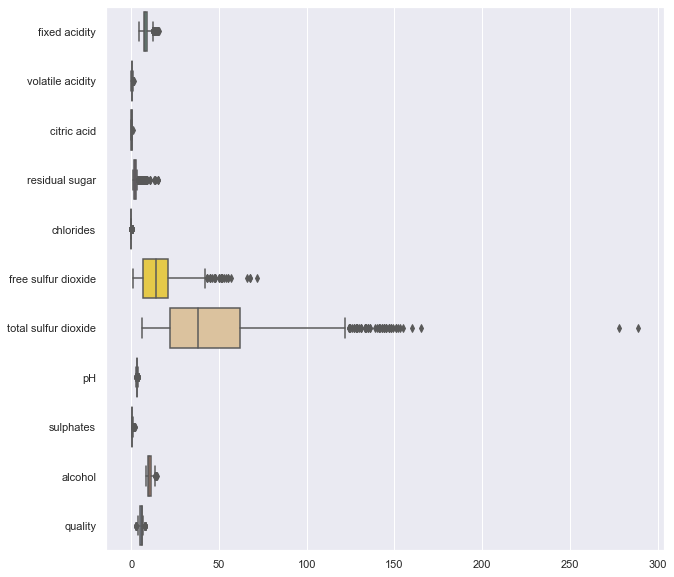

In [50]:
sns.set(rc={"figure.figsize":(10, 10)})
ax = sns.boxplot(data=X, orient="h", palette="Set2")

In [28]:
df.corrwith(df["quality"])

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
dtype: float64

<AxesSubplot:>

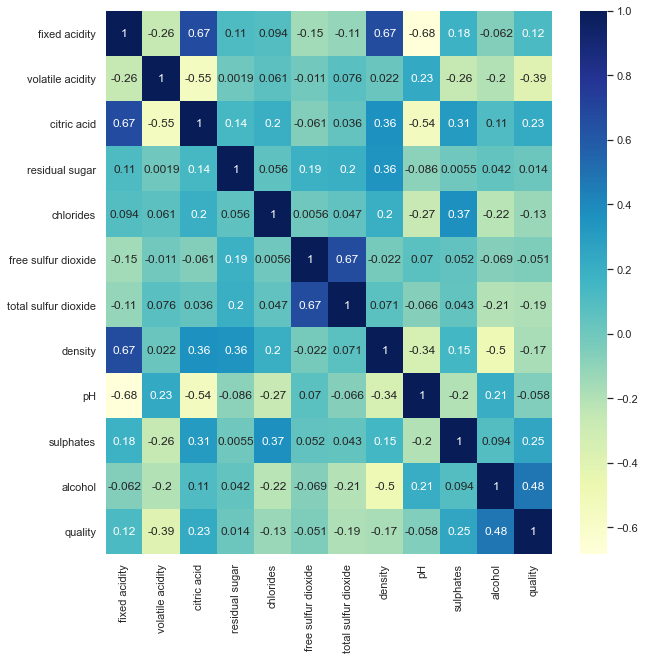

In [30]:
sns.set(rc={"figure.figsize":(10, 10)})
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

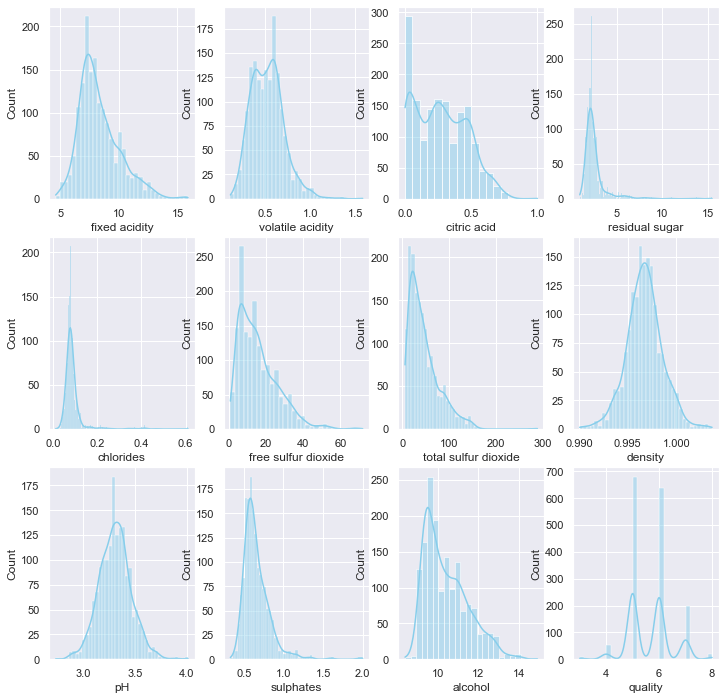

In [71]:
fig, axs = plt.subplots(3, 4, figsize=(12, 12))
columns = df.columns[:12]
k=0
sns.set(font_scale=1)
for i in range(3):
    for j in range(4):
        sns.histplot(data=df, x=columns[k], kde=True, color="skyblue", ax=axs[i, j])
        k+=1

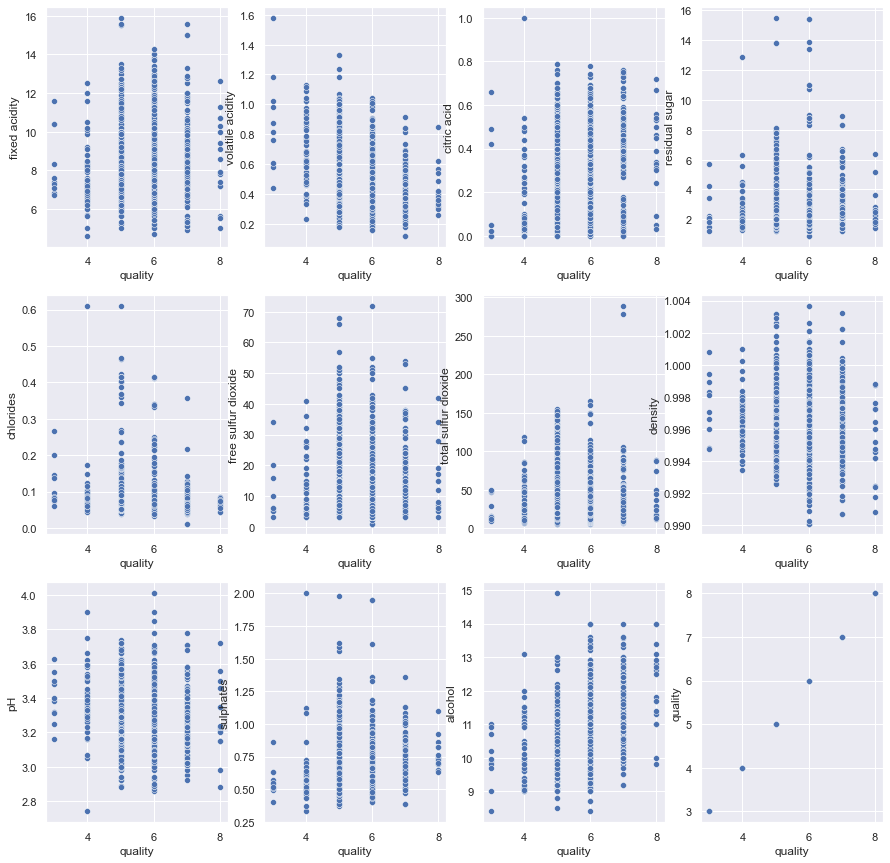

In [76]:
fig, axs = plt.subplots(3, 4, figsize=(15, 15))
columns = df.columns[:12]
k=0
sns.set(font_scale=1)
for i in range(3):
    for j in range(4):
        sns.scatterplot(data=df, x="quality", y=columns[k], ax=axs[i, j])
        k+=1

**outliers**

In [83]:
#based on the boxplots total sulfur dioxide has many outliers
d1= df['total sulfur dioxide']
mean = np.mean(df['total sulfur dioxide'])
std = np.std(df['total sulfur dioxide'])
print('mean of the dataset is', mean)
print('std. deviation is', std)

mean of the dataset is 46.46779237023139
std. deviation is 32.88503665178367


In [86]:
#z method
#total sulfur dioxide
out=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(df['total sulfur dioxide'])

Outliers: [148.0, 153.0, 165.0, 151.0, 149.0, 147.0, 148.0, 155.0, 151.0, 152.0, 278.0, 289.0, 160.0, 147.0, 147.0]


In [87]:
#z method
#free sulfur dioxide
out=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(df['free sulfur dioxide'])

Outliers: [52.0, 51.0, 50.0, 68.0, 68.0, 54.0, 53.0, 52.0, 51.0, 57.0, 50.0, 48.0, 48.0, 72.0, 51.0, 51.0, 52.0, 55.0, 55.0, 48.0, 48.0, 66.0]


In [88]:
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
iqr_outliers(df['free sulfur dioxide'])

Outliers: [52.0, 51.0, 50.0, 68.0, 68.0, 43.0, 47.0, 54.0, 46.0, 45.0, 53.0, 52.0, 51.0, 45.0, 57.0, 50.0, 45.0, 48.0, 43.0, 48.0, 72.0, 43.0, 51.0, 51.0, 52.0, 55.0, 55.0, 48.0, 48.0, 66.0]


**Transformations**

When our original continuous data do not follow the bell curve, we can log transform this data to make it as “normal” as possible so that the statistical analysis results from this data become more valid

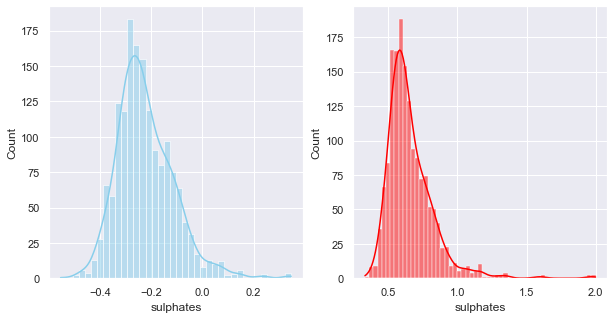

In [121]:
#residual sugar
a = np.log(df['sulphates'])*0.5


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.histplot(data=df, x=df['sulphates'],ax=ax2, kde=True, color="red")
sns.histplot(data=df, x=a, kde=True,ax=ax1, color="skyblue")
plt.show()


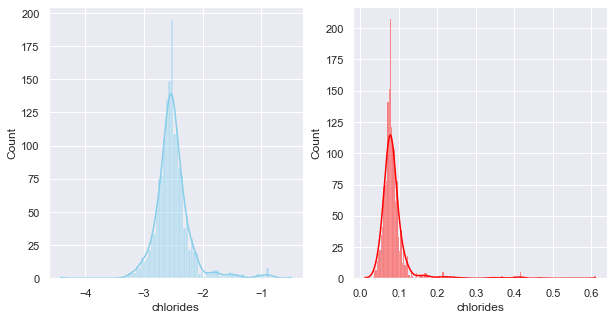

In [127]:
#residual sugar
a = np.log(df['chlorides'])


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.histplot(data=df, x=df['chlorides'],ax=ax2, kde=True, color="red")
sns.histplot(data=df, x=a, kde=True,ax=ax1, color="skyblue")
plt.show()

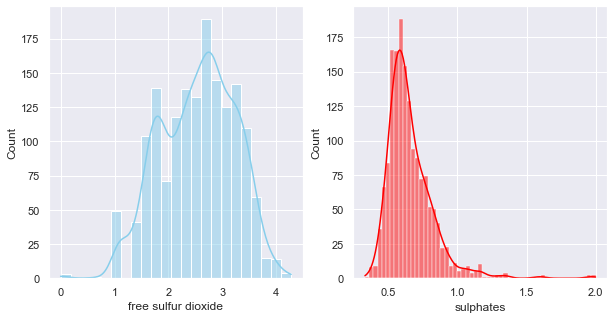

In [129]:
#residual sugar
a = np.log(df['free sulfur dioxide'])


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
#before log tranformation
sns.histplot(data=df, x=df['sulphates'],ax=ax2, kde=True, color="red")
#After log tranformation
sns.histplot(data=df, x=a, kde=True,ax=ax1, color="skyblue")
plt.show()

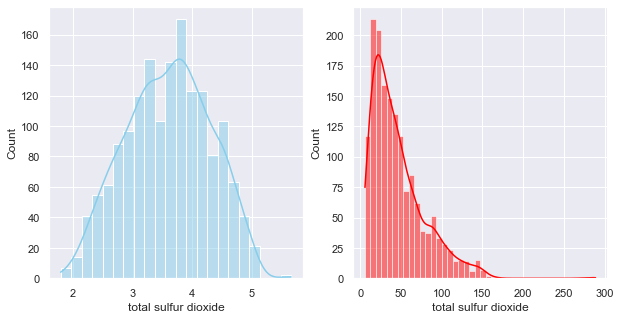

In [130]:
#total sulfur dioxide
a = np.log(df['total sulfur dioxide'])


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
#before log tranformation
sns.histplot(data=df, x=df['total sulfur dioxide'],ax=ax2, kde=True, color="red")
#After log tranformation
sns.histplot(data=df, x=a, kde=True,ax=ax1, color="skyblue")
plt.show()

**BOXCOX and other transformations**

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import math
%matplotlib inline
from scipy import stats

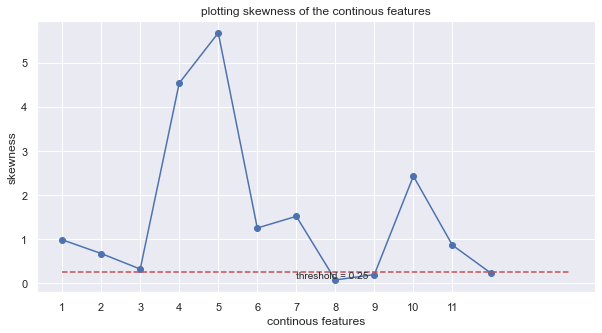

In [155]:
skewness_list = []
for cn in df.columns:
    skewness_list.append(stats.skew(df[cn]))

plt.figure(figsize=(10,5))
plt.plot(skewness_list, 'bo-')
plt.xlabel("continous features")
plt.ylabel("skewness")
plt.title("plotting skewness of the continous features")
plt.xticks(range(11), range(1,12,1))
plt.plot([(0.25) for i in range(0,14)], 'r--')
plt.text(6, .1, 'threshold = 0.25')
plt.show()

In [151]:
skewed_cont_columns = []
for i, cn in enumerate(df):
    if skewness_list[i] >= 0.25:
        skewed_cont_columns.append(cn)

D:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

D:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

D:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

D:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distpl

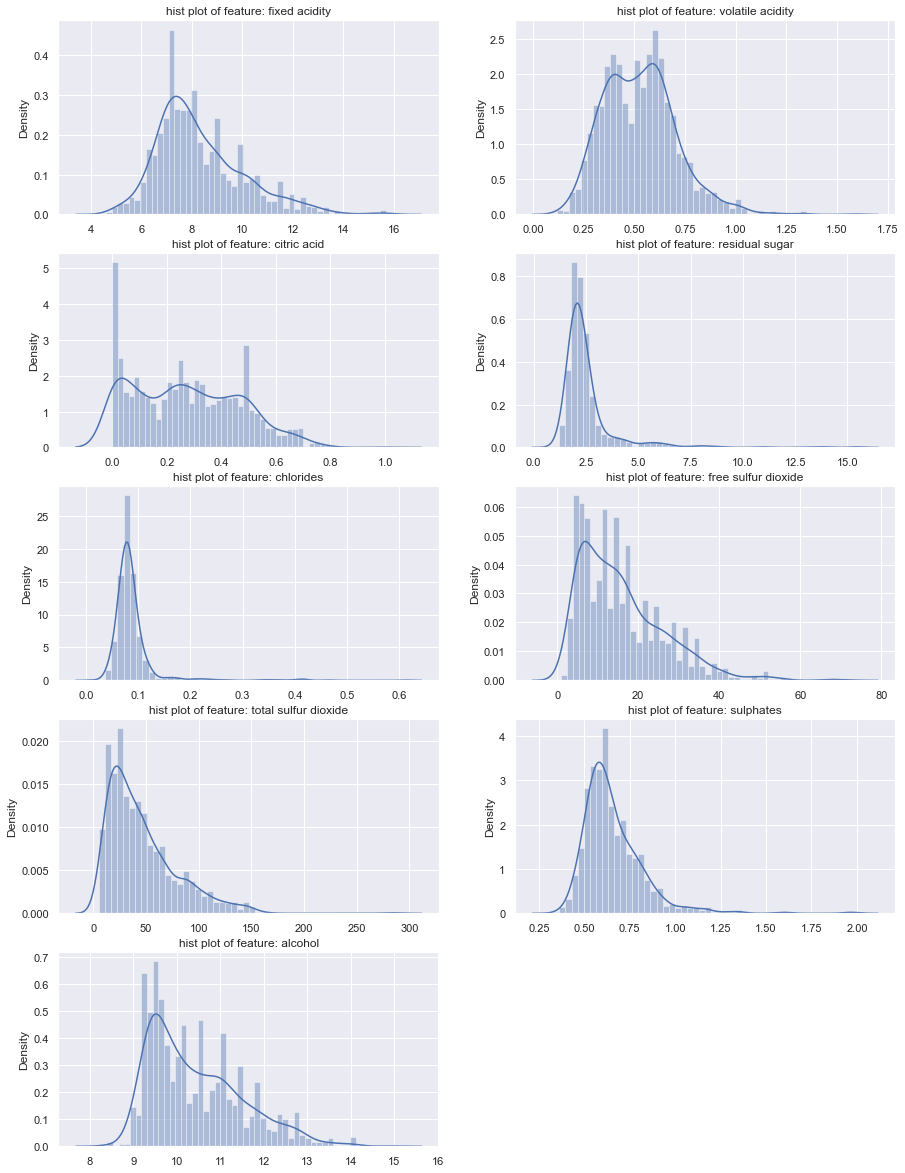

In [153]:
import matplotlib.gridspec as gridspec
plt.figure(figsize=(15,25))
gs = gridspec.GridSpec(6, 2)
for i, cn in enumerate(skewed_cont_columns):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn], bins=50)
    ax.set_xlabel('')
    ax.set_title('hist plot of feature: ' + str(cn))
plt.show()

In [201]:
def examine_transform(original, transformed):
    plt.figure(figsize=(15,10))
    gs = gridspec.GridSpec(3,2, width_ratios=(1,2))
    
    ax = plt.subplot(gs[0])
    sns.distplot(original, bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of orignal feature')
    
    ax = plt.subplot(gs[1])
    prob = stats.probplot(original, dist = stats.norm, plot = ax, rvalue=True)
    ax.set_xlabel('')
    ax.set_title('Probplot of original feature')
    
    ax = plt.subplot(gs[2])
    sns.distplot(transformed, bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of transformed feature')
    
    ax = plt.subplot(gs[3])
    prob = stats.probplot(transformed, dist = stats.norm, plot = ax, rvalue=True)
    ax.set_xlabel('')
    ax.set_title('Probplot of transformed feature')
    
    # apply boxcox transformation
    xt, _ = stats.boxcox(original)
    ax = plt.subplot(gs[4])
    sns.distplot(xt, bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of boxcox transformed feature')
    
    ax = plt.subplot(gs[5])
    prob = stats.probplot(xt, dist = stats.norm, plot = ax, rvalue=True)
    ax.set_xlabel('')
    ax.set_title('Probplot of boxcox transformed feature')
    
    
    plt.show()

D:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

D:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

D:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



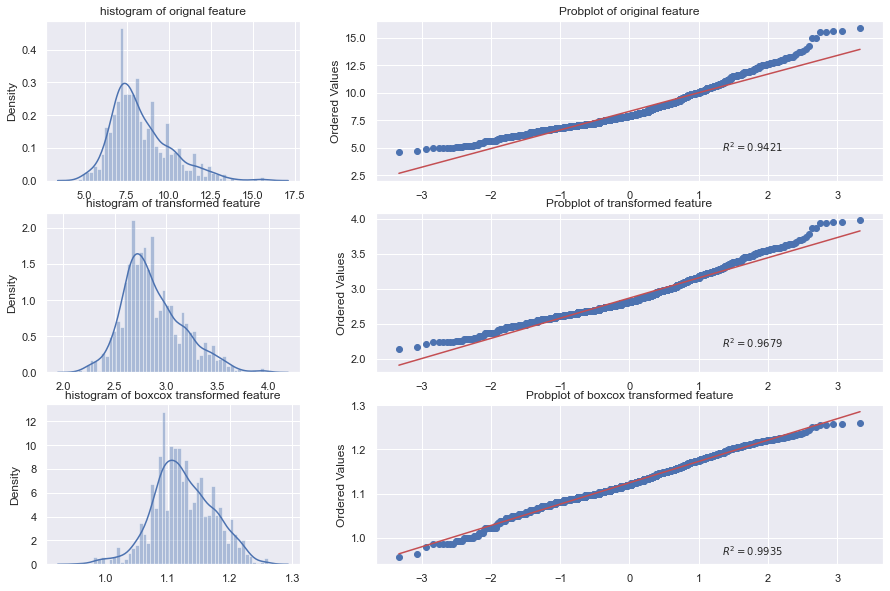

In [202]:
examine_transform(df['fixed acidity'], np.power(df['fixed acidity'],0.5))

['fixed acidity'] best tranformation appears to boxcox

D:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

D:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

D:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



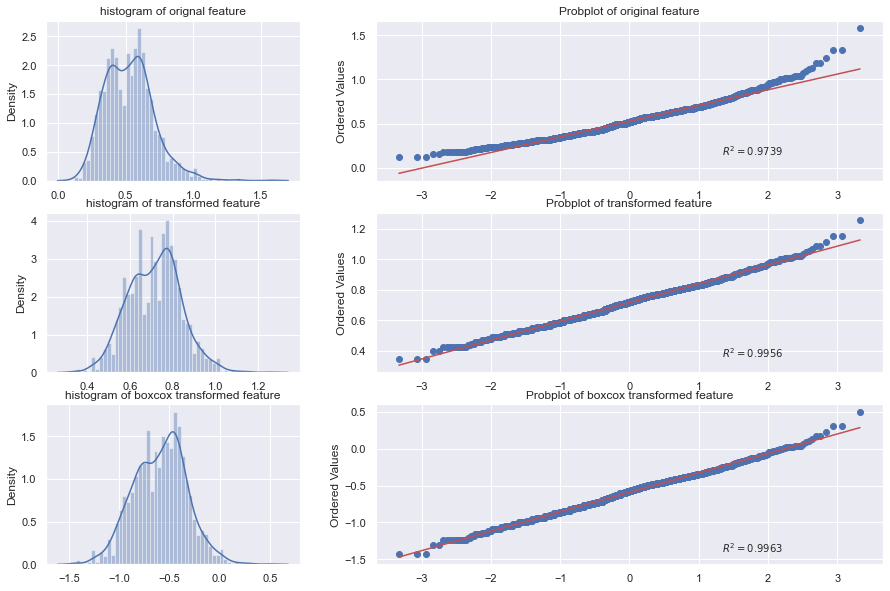

In [178]:
examine_transform(df['volatile acidity'], np.power(df['volatile acidity'],0.5))

['volatile acidity'] best tranformation appears to boxcox

D:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

D:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

D:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



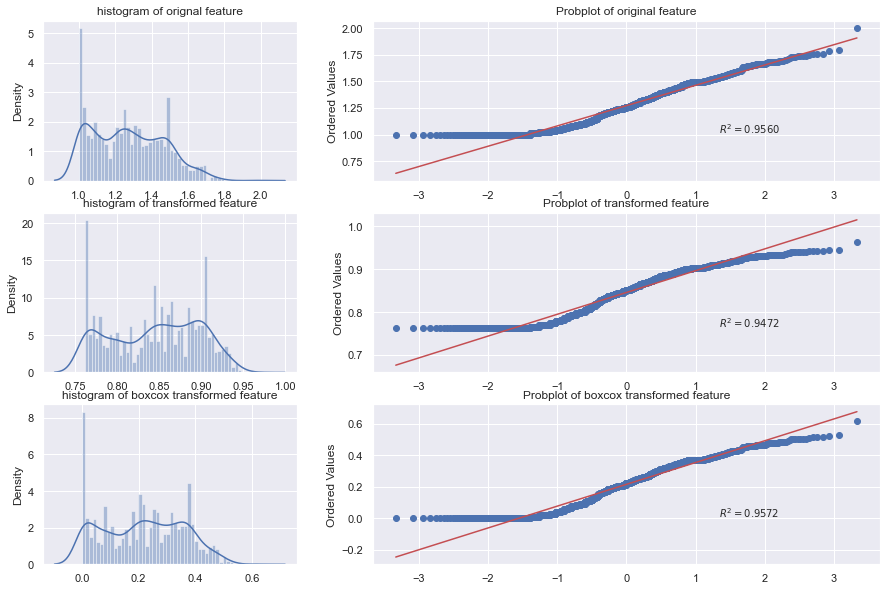

In [179]:
examine_transform(df['citric acid']+1, np.tanh(df['citric acid']+1))

citric acid best tranformation appears to boxcox

D:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

D:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

D:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



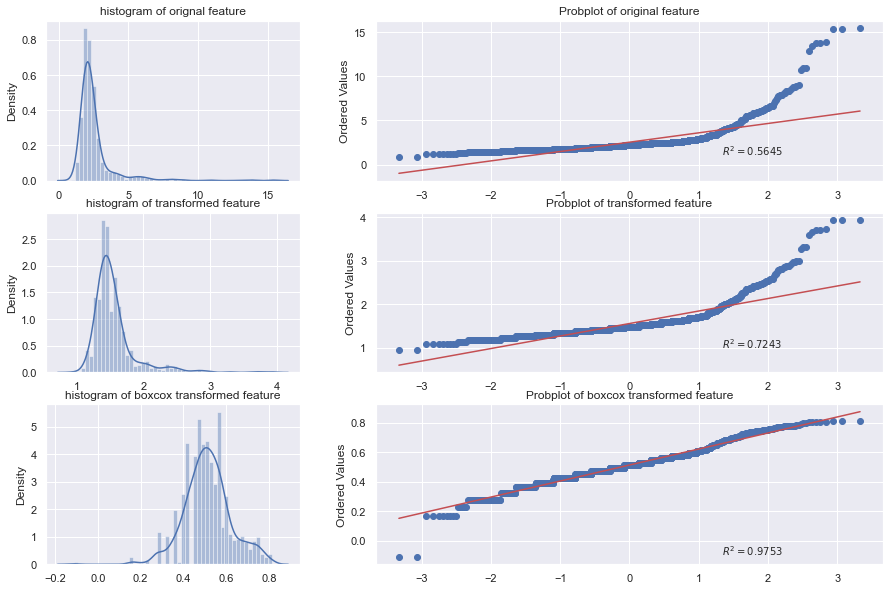

In [180]:
examine_transform(df['residual sugar'], np.power(df['residual sugar'],0.5))

residual sugar best tranformation appears to boxcox

D:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

D:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

D:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



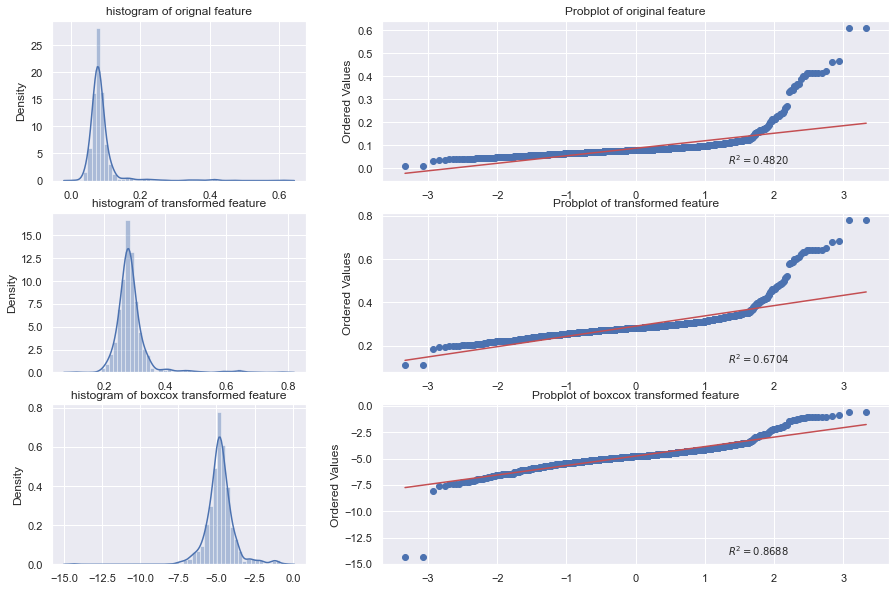

In [184]:
examine_transform(df['chlorides'], np.power(df['chlorides'],0.5))

chlorides best tranformation appears to boxcox

D:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

D:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

D:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



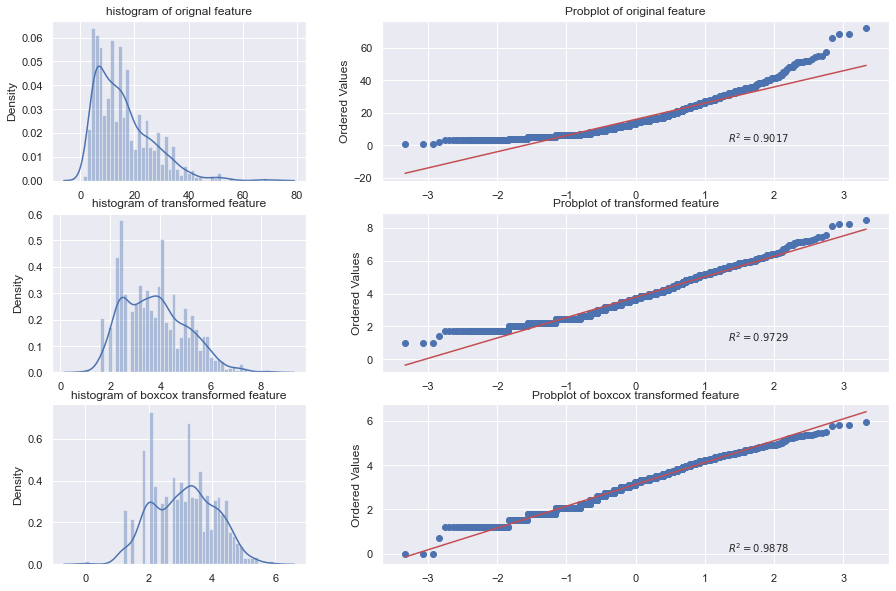

In [188]:
examine_transform(df['free sulfur dioxide'], np.power(df['free sulfur dioxide'],0.5))

D:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

D:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

D:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



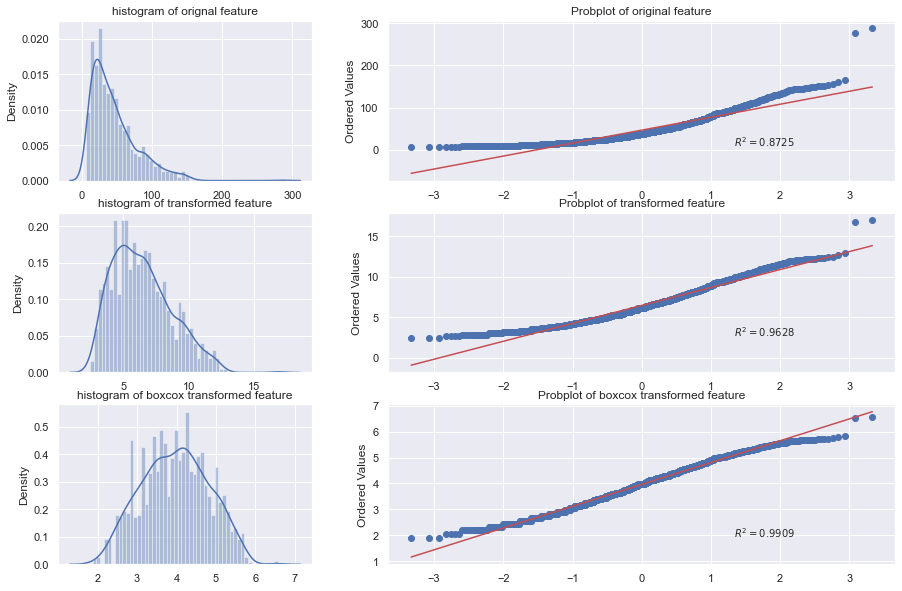

In [189]:
examine_transform(df['total sulfur dioxide'], np.power(df['total sulfur dioxide'],0.5))

D:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

D:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

D:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



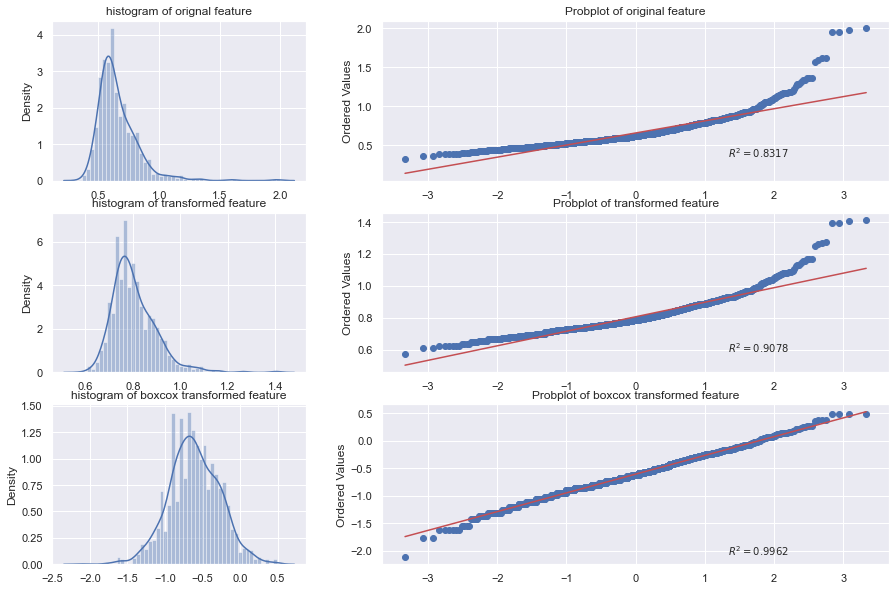

In [190]:
examine_transform(df['sulphates'], np.power(df['sulphates'],0.5))

D:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

D:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

D:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



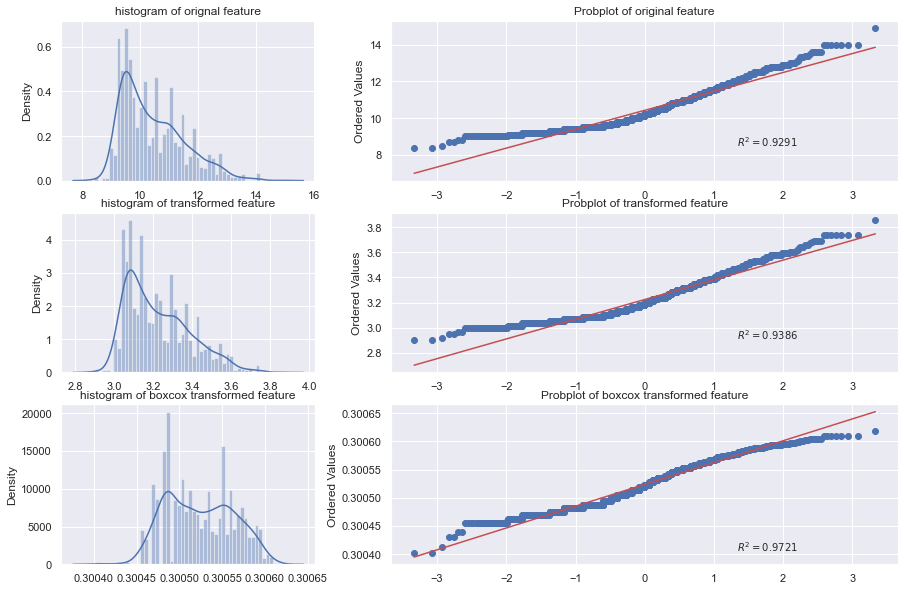

In [192]:
examine_transform(df['alcohol'], np.power(df['alcohol'],0.5))

**Split the Data**

In [37]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=43)
train_X.shape,valid_X.shape

((959, 11), (640, 11))